# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import warnings # suppress unnecessary warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.precision', 3)

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# read the data
# df = pd.read_csv('foodhub_order.csv') # for local
df = pd.read_csv('/content/drive/MyDrive/Education/GreatLearning/PythonFoundations/Project/foodhub_order.csv') # for the google drive
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


- *The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer*.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
print('There is', df.shape[0], 'rows and', df.shape[1], 'columns')

There is 1898 rows and 9 columns


- *The dataset contains 1898-row and 9-colmn records about the orders.*

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# using .info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- *This method printed 3 non-null data set types - int64, float64, and pandas string object types.*

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# the isnull(alias for isna) method is used to for boolean checking None type values, using method sum() helps count them if they exist:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

- *There are no missing values in the dataset.*

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# let's hide some unique identifiers and change the scientific format.
df.iloc[:,2:].describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.00000,16.49885,7.48381,4.47000,12.08000,14.14000,22.29750,35.41000
food_preparation_time,1898.00000,27.37197,4.63248,20.00000,23.00000,27.00000,31.00000,35.00000
delivery_time,1898.00000,24.16175,4.97264,15.00000,20.00000,25.00000,28.00000,33.00000


- *The cost of the orders ranges from around 4 dollars to 36 dollars, the average cost of the order amount is around 17 dollars. The average of the order amount are less and more than 14 dollars*
- *The time of food preparation ranges from 20 to 35 minutes, the average time of food preparation is around 27 minutes. The average of the food preparation are less and more than 27 minutes*
- *The delivery time ranges from 20 to 35 minutes, the delivery time is around 27 minutes. The average of the delivery time is 27 minutes*

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# to count the non-rated orders the method value_counts() can be used with the index filtering:
df[df['rating'] == 'Not given'].value_counts()

order_id  customer_id  restaurant_name        cuisine_type   cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476551   49034        The Smile              American       12.18              Weekend          Not given  22                     27               1
1477772   91958        TAO                    Japanese       12.18              Weekday          Not given  26                     33               1
1477753   65306        Sushi of Gari Tribeca  Japanese       14.79              Weekend          Not given  32                     24               1
1477756   251607       Shake Shack            American       14.12              Weekday          Not given  31                     28               1
1477757   60688        Shake Shack            American       14.12              Weekend          Not given  29                     30               1
                                                                                                         

- *736 data set orders have not been evaluated and require further processing.*

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
# the seaborn will be used for the variables exploration
import seaborn as sb

In [10]:
# check the counted orders Ids
print('The dataframe contains %d numbers of unique orders ids.' %df['order_id'].nunique())

# check the counted customers Ids
print('The dataframe contains %d numbers of unique customers ids.' %df['customer_id'].nunique())

# ckeck the unique restaurants' names
print('The dataframe contains %s numbers of restaurants.' %df['restaurant_name'].nunique())

# ckeck the unique cousins' names
print('The dataframe contains %s numbers of cuisine types.' %df['cuisine_type'].nunique())

The dataframe contains 1898 numbers of unique orders ids.
The dataframe contains 1200 numbers of unique customers ids.
The dataframe contains 178 numbers of restaurants.
The dataframe contains 14 numbers of cuisine types.


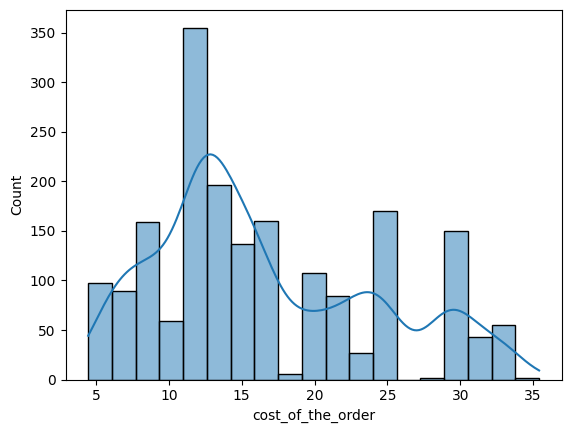

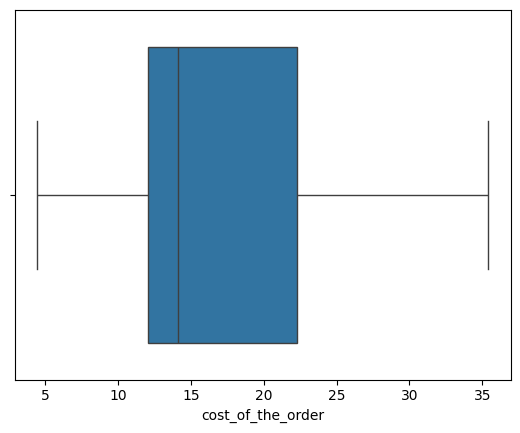

In [11]:
# the distribution of cost of the order
sb.histplot(data=df, x='cost_of_the_order', kde= True)
plt.show()
sb.boxplot(data=df, x='cost_of_the_order')
plt.show()

- *Half of the customers pay less than 14 dollars for overall the orders.*
- *50% of the cost of the orders lies in range between 12 to 22 dollars.*
- *The `cost_of_the_order` column is right-skewed, that's mean that price tends to be larger than the median.*

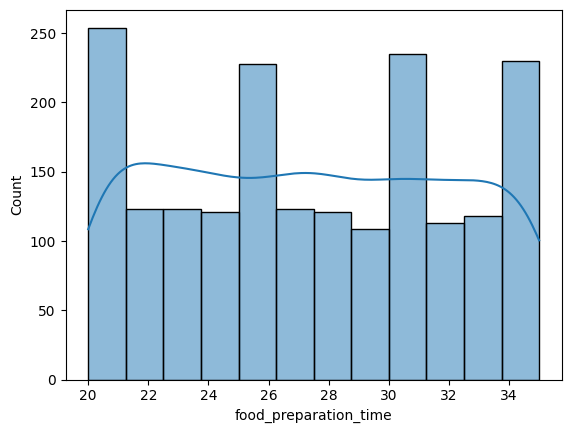

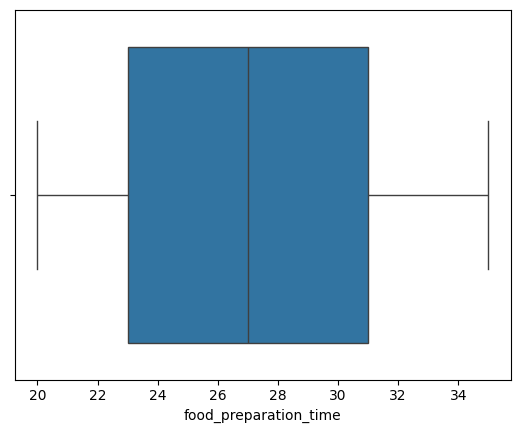

In [12]:
# plot the distribution of food preparation time
sb.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
sb.boxplot(data=df, x='food_preparation_time')
plt.show()

- *Half of the orders are preparied for 27 minutes and lie in range between 23 and 31 minutes.*

<Axes: xlabel='rating', ylabel='Count'>

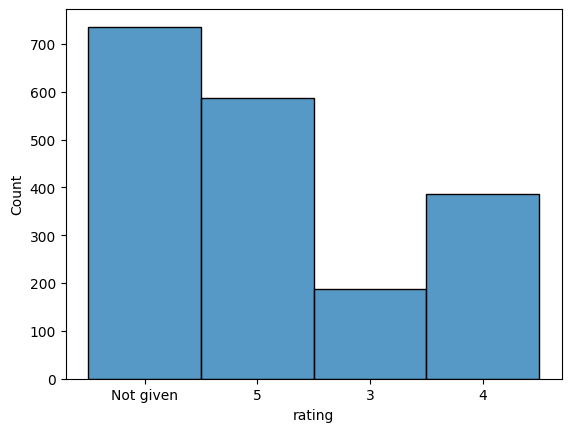

In [13]:
# the distribution of the rating.
sb.histplot(data=df, x='rating', discrete=True)

In [14]:
# let's check the percentage not rated orders.
df_not_rated=df[df['rating'] == 'Not given'].value_counts().sum() * 100/df['rating'].value_counts().sum()
# printing the result
print('The percentage not rated orders is %d' % round(df_not_rated, 1))

The percentage not rated orders is 38


- *A significant number of the orders ~40 percent are not rated and need to be treated further.*

In [15]:
# treatment of the unrated values.
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


In [16]:
# first let's check the duplicates summ
print('The the duplicates is %d' % df.duplicated().sum())

The the duplicates is 0


In [17]:
# 1. replacing 'Not given' values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)
# 2. Check the replaced NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [18]:
# 3. change the string pd type of the rating column to the float type
df['rating']=df['rating'].astype(float)

In [19]:
# 4. checking the missing number of the rating
df.loc[df['rating'].isnull() == True, 'restaurant_name'].value_counts().sum()

736

- *To treat Nan ("Not given") values, let's impute the averaged rating for each restaurant into the missing rating value for this restaurant:*

In [20]:
# 5. checking the averaged rating for each restaurant:
grouped_by_averaged = df.groupby(['restaurant_name'])[['rating']].mean().reset_index()
grouped_by_averaged

,restaurant_name,rating
0,'wichcraft,5.000
1,12 Chairs,4.500
2,5 Napkin Burger,4.000
3,67 Burger,5.000
4,Alidoro,NaN
...,...,...
173,Zero Otto Nove,4.000
174,brgr,3.000
175,da Umberto,5.000
176,ilili Restaurant,4.154


- *Some averaged values for the rating are still missing because of some restaurants have fully missing rating values.*

In [21]:
# 6. check the missing averaged values for the rating:
print('The averaged missing values', grouped_by_averaged.loc[df['rating'].isnull() == True, 'restaurant_name'].value_counts().sum())

The averaged missing values 72


- *Some missing averaged values points that we can't impute all NaN rating values, let's reduce them and improve the proposed estimation for the rated values.*
- *To keep the imputed averaged rating value discrete let's round it in during the imputing:*

In [22]:
# 7. reducing the NaN in the rating column with the imputed rounded averaged rating values:
df['rating'] = df['rating'].fillna(value = round(df.groupby(['restaurant_name'])['rating'].transform('mean'), 0))
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,5.0,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26


In [23]:
# 8. counting the remaining NaN values after imputing
print('Remaining sum of missing values:', df.loc[df['rating'].isnull() == True, 'restaurant_name'].value_counts().sum())

Remaining sum of missing values: 30


- *After the imputation of unestimated values their number was reduced from 736 to 30, so the analysis of missing estimates was improved.*
- *Now let's check the distribution of the rating variables:*

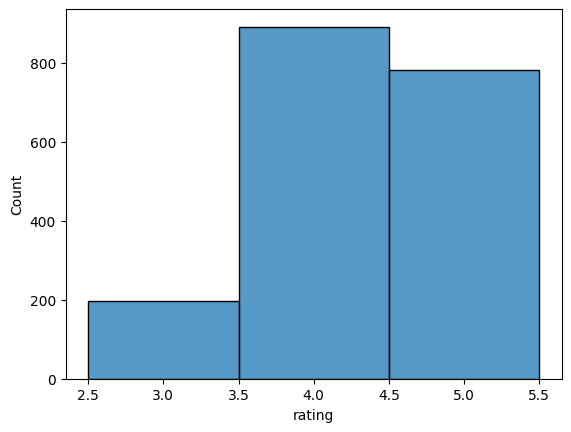

In [24]:
# finally let's build the proposed distribution of the rating with the imputed values.
sb.histplot(data=df, x='rating', discrete=True)
plt.show()

- *After imputing the average values, a rating value of 4 prevails.*

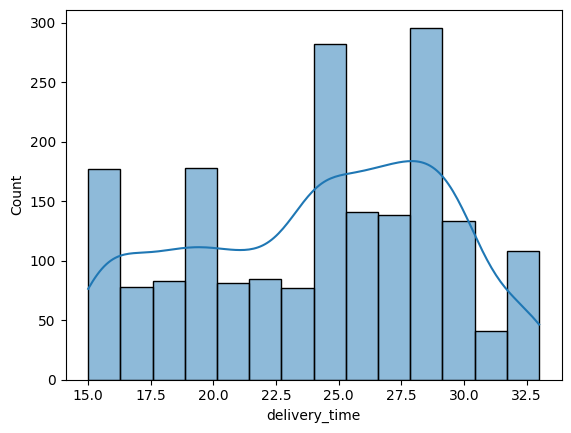

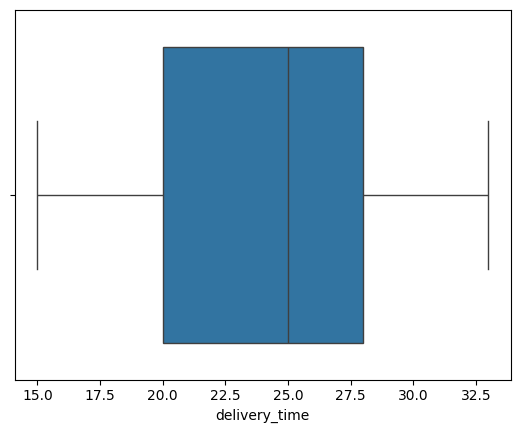

In [25]:
# let's check the distribution of the delivery time.
sb.histplot(data=df, x = 'delivery_time', kde=True)
plt.show()
sb.boxplot(data=df, x='delivery_time')
plt.show()

- *Half of the delivery time less than 25 minutes.*
- *50% of the delivery time lies in range between 20 to 28 minutes.*
- *The `delivery_time` column is slightly left-skewed, the mean of the delivery tends to be slightly less than the median.*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
# using the chain of the methods .value_counts().sort_values on the dataframe:
df['restaurant_name'].value_counts().sort_values(ascending = False).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

- *The 5 top restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, which have the biggest amount of order numbers.*

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [27]:
# filtering days of week
df_week = df[df['day_of_the_week'] == 'Weekend']
df_week['cuisine_type'].value_counts().sort_values(ascending = False).head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

- *The most popular cuisine on the weekend is American, Japanese, Italian, Chinese, and Mexican.*

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [28]:
# filtering the orders more than 20
df_more_than_20=df[df['cost_of_the_order']>20]
# Using first index of the returned tuple to find the percentage
df_more_than_20_percentage=df_more_than_20.shape[0] * 100/df.shape[0]
# printing the result
print('The percentage of the orders cost more than 20 dollars %d' % round(df_more_than_20_percentage, 1))

The percentage of the orders cost more than 20 dollars 29


- *The percentage of the orders cost more than 20 dollars is about 29.*
- *About 30 percent of orders cost more than $20.*

### **Question 10**: What is the mean order delivery time? [1 mark]

In [29]:
print('The mean of the delivery time is ', round(df['delivery_time'].mean(), 1))

The mean of the delivery time is  24.2


- *Mean of the delivery time is ~24 minutes.*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [30]:
df['customer_id'].value_counts().sort_values(ascending = False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

- *In this case, the identifier customer ID holds meaningful information and helps define 3 top most frequent customers with numbers - 52832, 47440, 83287.*

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: xlabel='cuisine_type', ylabel='count'>

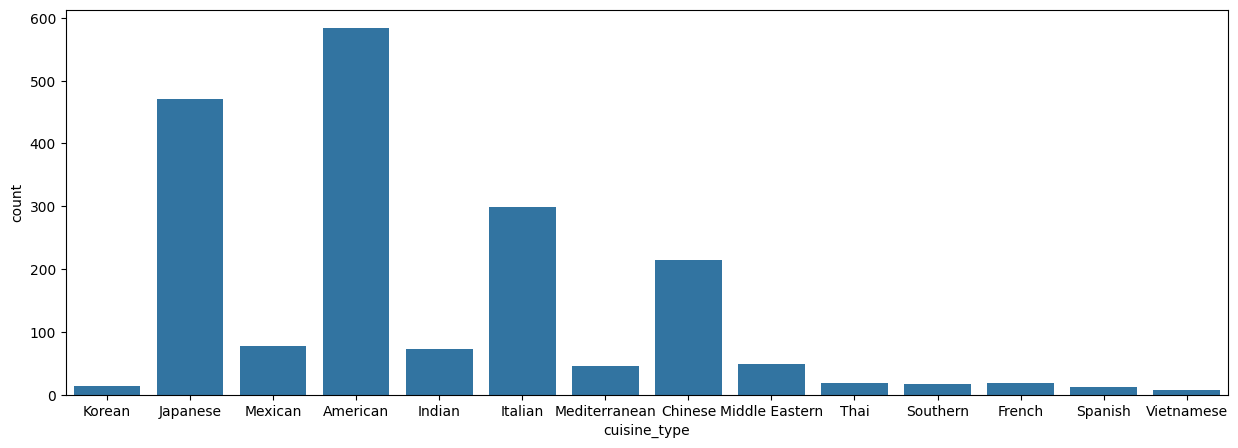

In [31]:
# cheking the relationship related to main categirical variable - the cuisine type
plt.figure(figsize=(15,5)) # increase the plot area size
# using the countplot for cuisine type.
sb.countplot(data = df, x = 'cuisine_type')

- *This distribution shows 4 main types of mostly ordered cuisine: American, Japanese (probably sushi and other rolls), Italian, and Chinese.*

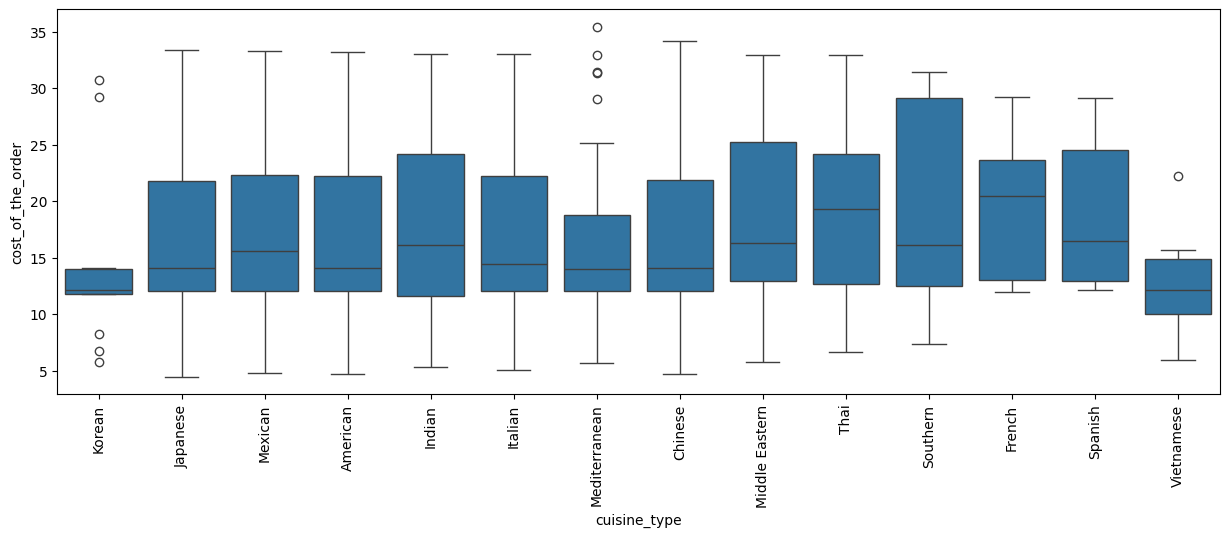

In [32]:
# checking the relationship between the cuisine type and the cost of the order
plt.figure(figsize=(15,5)) # increase the plot area size
sb.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

- *The median of the order cost distribution shows that the minimal median price has Korean and Vietnamese cuisine, the maximum median price has French cuisine.*
- *The distribution for all cuisines are right-skewed, except Thia, French, and Vietnamese cuisine.*
- *Most of the price variety belongs to Japanese and Mediterranean cuisine if consider the outliers.*

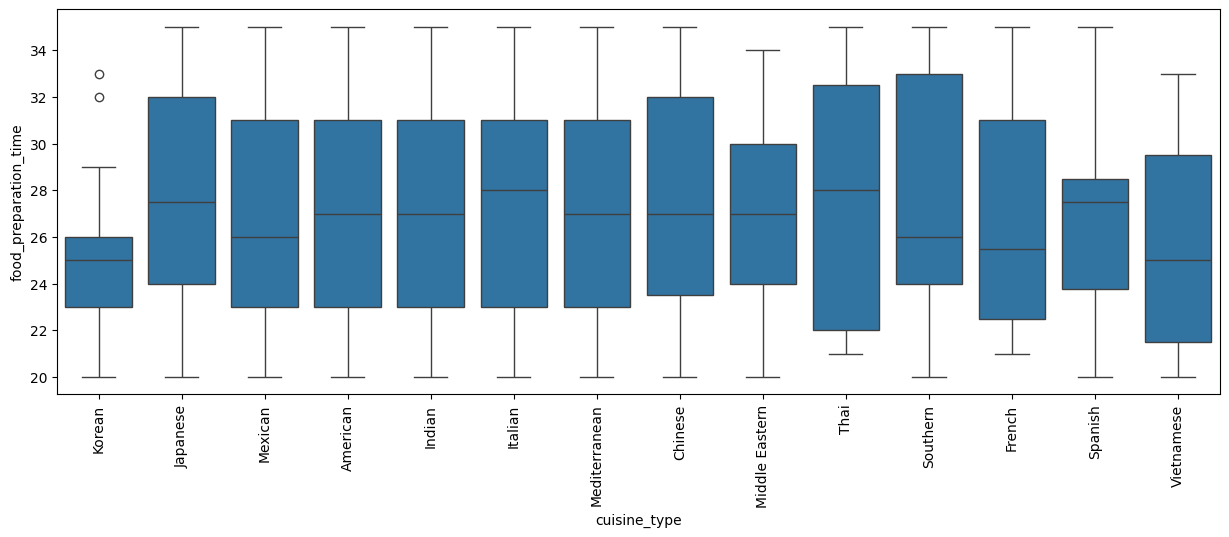

In [33]:
# checking the relationship between the cuisine type and the time of the food preparation
plt.figure(figsize=(15,5)) # increase the plot area size
sb.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

- *The median of the order cost distribution shows that the median time of the preparation food lies in the range between 25 and 28 minutes and approximately the same for all cuisines.*
- *The minimal and maximal time of the food preparation lies in the range between 20 and does not exceed 36 minutes for all orders.*

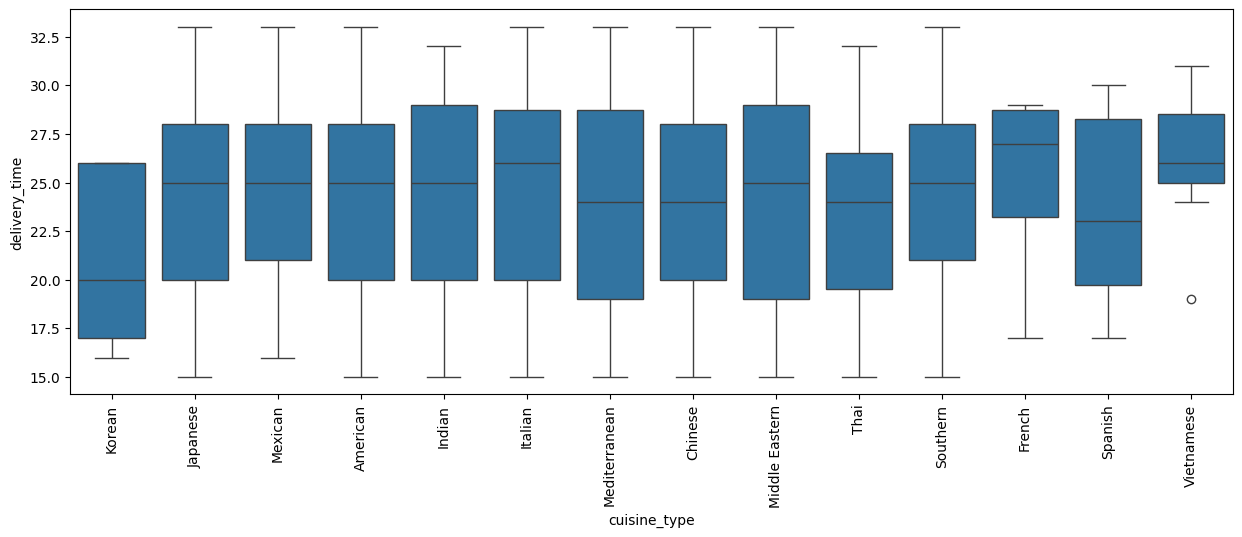

In [34]:
# checking the relationship between the cuisine type and the delivery time
plt.figure(figsize=(15,5)) # increase the plot area size
sb.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=90)
plt.show()

- *The median of the delivery time lies in the range between 20 and 26 minutes.*
- *The minimal and maximal time of the delivery time lies in the range between 15 and 33 minutes for all orders.*
- *The distribution time of the delivery is left-skewed for all cuisines except French, symmetric Chinese, and Mediterranean, Korean, and Spanish right-skewed distribution.*    

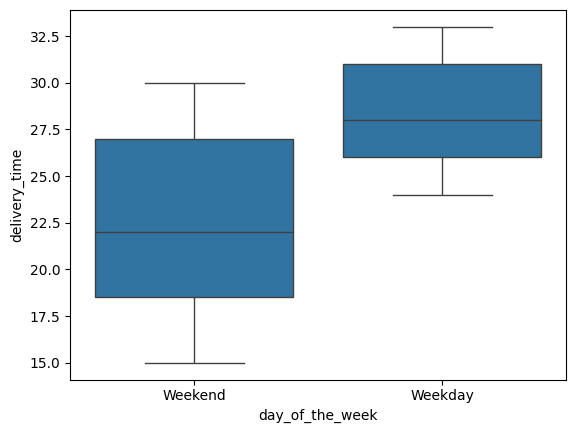

In [35]:
# checking the relationship between the day of week and the delivery time
sb.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

- *The median delivery time on the weekend is less than on any weekday - ~22 and ~28 minutes respectively.*
- *This difference is affected by the traffic conditions - on the week the traffic is higher than on the weekend day.*

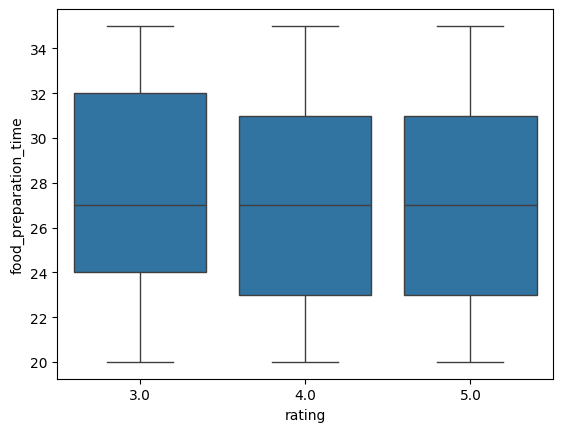

In [36]:
# estimation rating values and the food preparation time
sb.boxplot(data=df, x='rating', y='food_preparation_time')
plt.show()

- *The range and the median value of the food preparation time is the same for all given ratings.*

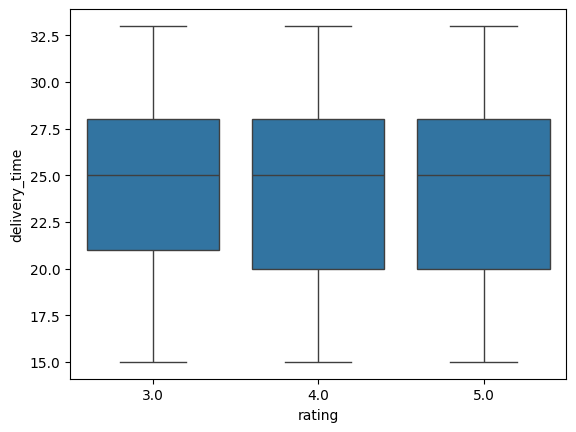

In [37]:
# estimation rating values and the delivery time
sb.boxplot(data=df, x='rating', y='delivery_time')
plt.show()

- *The range, and the median value of the delivery time are almost the same for all given ratings.*

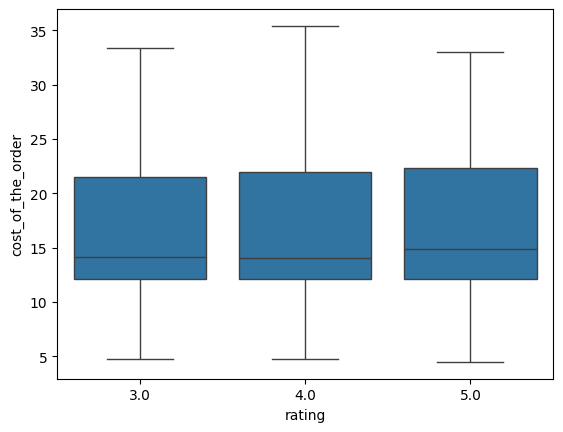

In [38]:
# estimation rating values and the cost of the orders
sb.boxplot(data=df, x='rating', y='cost_of_the_order')
plt.show()

- *The range, and median value of the order cost are almost the same for all given ratings.*

<Axes: xlabel='rating', ylabel='count'>

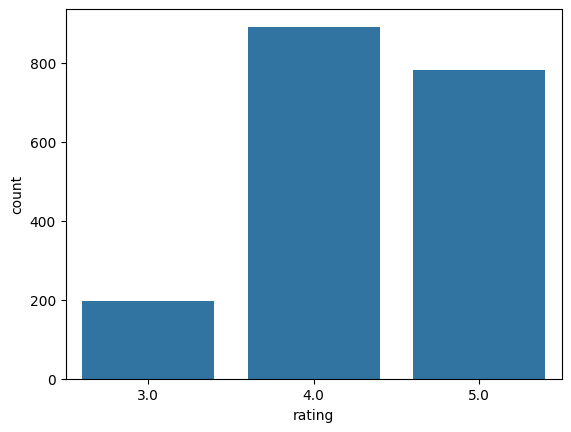

In [39]:
# estimation rating values and quantity of the orders
sb.countplot(data = df, x = 'rating')

- *The most number have the orders with rating 4 and more.*

In [40]:
# let's estimate the distribution between cuisine types and the revenue
# counting the sum of the revenue by grouping with the cuisine type
counted_revenue = df.groupby(['cuisine_type'])[['cost_of_the_order']].sum()
counted_revenue.sort_values(by='cost_of_the_order', ascending = False)

,cost_of_the_order
cuisine_type,
American,9530.78
Japanese,7663.13
Italian,4892.77
Chinese,3505.62
Mexican,1303.85
Indian,1235.14
Middle Eastern,922.21
Mediterranean,711.84
Thai,364.95


- *The most revenue generated from American, Japanese, Italian, Chinese, Mexican, and Indian cuisines.*

In [41]:
# estimating the difference of the order's costs between the weekday and the weekend
revenue_by_weekday = df.groupby(['day_of_the_week'])[['cost_of_the_order']].sum()
revenue_by_weekday

,cost_of_the_order
day_of_the_week,
Weekday,8922.22
Weekend,22392.60


- *On the weekend the revenue is about 22400 doll, on the weekend is about 8900 dollars.*

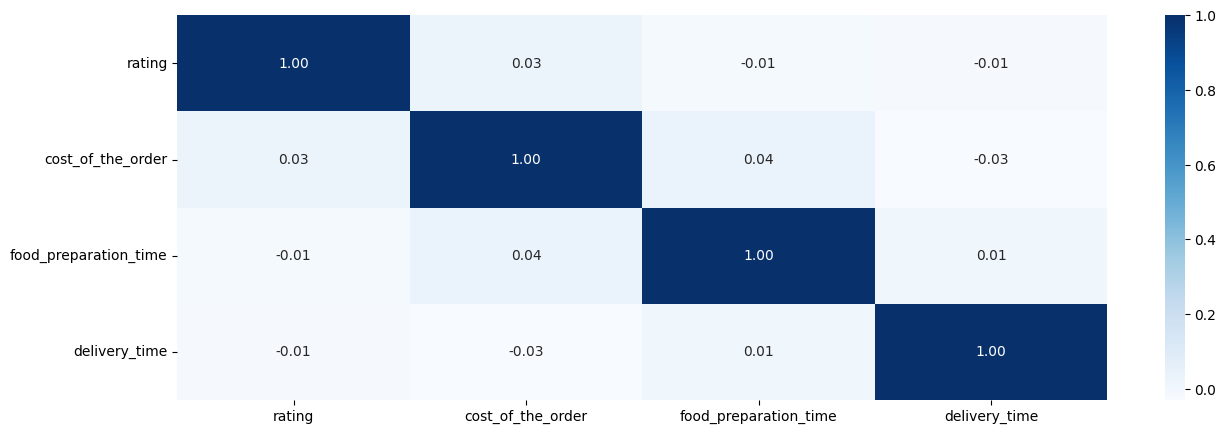

In [42]:
# let's choose some numerical variables for the estimation of the correlation between them
num_list = ['rating', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']
# changing all types to float to include the rating variable
for var in num_list:
  df[var] = df[var].astype(float)
plt.figure(figsize=(15, 5))
sb.heatmap(df[num_list].corr(),annot=True,cmap='Blues', fmt=".2f")
plt.show()

- *There is no explicite correlation between the numerical variables, that's means we can't find strong dependecies between rating, the cost of the order, the food preparation time, and the delivery time*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
# let's group, filter and sort the data:
df_rated_counted = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rated_avg = df.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
df_rated = pd.merge(df_rated_counted[df_rated_counted['rating'] > 50], df_rated_avg[df_rated_avg['rating'] > 4], on = 'restaurant_name' , suffixes=('_counted', '_average'))
df_rated.sort_values(by = 'rating_average', ascending = False)

,restaurant_name,rating_counted,rating_average
1,The Meatball Shop,132,4.689
3,Blue Ribbon Fried Chicken,96,4.219
5,RedFarm Broadway,59,4.169
0,Shake Shack,219,4.169
2,Blue Ribbon Sushi,119,4.134
6,RedFarm Hudson,55,4.109
4,Parm,68,4.074


- *The restaurants Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken have a rating count of more than 50 and an average rating of more than 4.*


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [44]:
# finding the revenue across the cost of the orders
# let's implement the simple helper function
def charging(price):
  if price > 20:
    return price*0.25
  elif price > 5:
    return price*0.15
  else:
    return 0
# let's add the column revenue
df['revenue_of_the_aggregator'] = df['cost_of_the_order'].apply(charging)

In [45]:
# checking the sum of the counted revenue by a restaurant
counted_revenue_for_the_agregator = df.groupby(['restaurant_name'])[['revenue_of_the_aggregator']].sum()
counted_revenue_for_the_agregator.sort_values(by = 'revenue_of_the_aggregator', ascending=False)

,revenue_of_the_aggregator
restaurant_name,
Shake Shack,703.607
The Meatball Shop,419.829
Blue Ribbon Sushi,360.460
Blue Ribbon Fried Chicken,340.204
Parm,218.557
...,...
Market Table,1.018
Wa Jeal,1.011
Cipriani Le Specialita,0.888


In [46]:
# total revenue for all restaurants is
print('Total revenue is %d dollars' % round(counted_revenue_for_the_agregator['revenue_of_the_aggregator'].sum(), 1))

Total revenue is 6166 dollars


- *The net revenue generated by the company across all orders is 6166 dollars.*

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [47]:
order_with_stotal_time_more_than_60 = df[(df['food_preparation_time'] + df['delivery_time']) > 60]
# finding the percentage
order_with_stotal_time_more_than_60_percentage = order_with_stotal_time_more_than_60.shape[0] * 100 / df.shape[0]
print('Percentage of orders take more than 60 minutes is %.2f percent' % order_with_stotal_time_more_than_60_percentage)

Percentage of orders take more than 60 minutes is 10.54 percent


- *The percentage of orders that take more than one hour is about 11 percent.*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
# using the method groupby()
delivery_time_mean = df.groupby(['day_of_the_week'])[['delivery_time']].mean()
delivery_time_mean

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


In [49]:
print('The delivery time average difference is %f'  % (delivery_time_mean.loc['Weekday']-delivery_time_mean.loc['Weekend']))

The delivery time average difference is 5.870014


- *The the mean of the delivery time betseen weekdays and weekends is about 6 minutes and match with previos result when the diffrence was estimated by boxplot.*
- *The time of the delivery is a little bit longer on the weekday due to the traffic.*

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* As expected, most revenue generate by the cousins with a rating of 4 or more.
* The most revenue is generated from American, Japanese, Italian, Chinese, Mexican, and Indian cuisines.
* The restaurants Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm generate more revenue.
* Looks that the revenue of American, Italian, Chinese, Mexican, and Indian cuisines is correlated with the diasporas' local distribution and needs further investigation.
* On the weekend the revenue is generated more than 2 and a half times more than on the weekday.

### Recommendations:
*  Motivate customers to rate more orders to reduce unrated values. 40% of the missing feedback has some negative impact on future orders.
*  Collaborating with the restaurants with low order ratings to improve the food rating from 3 up to 4 and higher so that partner restaurants maintain high-quality standards in food preparation, packaging, and delivery. Establish quality control measures and provide feedback mechanisms for users to report issues with orders.
*  Focus on expanding your customer network by finding restaurants with the most popular cuisines - American, Japanese, Italian, Chinese, Mexican, and Indian - as they generate the most revenue.
*  Implement loyalty programs and promotions for partner restaurants and customers with discounts, cashback offers, and exclusive deals to stimulate repeat orders.
*  Improve search and recommendation algorithms to allow users to easily find restaurants based on the nearest location, cuisine type, price range, and user ratings.
*  Implement recommendation algorithms that suggest restaurants and dishes based on user preferences and past orders.
*  Optimize delivery logistics to minimize delivery times and ensure timely order fulfillment, invest in logistics technology and tracking systems to optimize delivery operations and improve efficiency.

---